# <span style="color:darkslategray">ABC LLC - Leads for Health Insurance Services </span>

### <span style="color:dimgray">Importing packages</span>

In [1]:
# Importing general packages
import pandas as pd
import dfply

from dfply import *
import numpy as np

# Importing packages for vizualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

# Importing packages for encoding and standardization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Importing packages for custering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Importing packages for modeling
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

### <span style="color:dimgray">Loading data</span>

<b>Features of df_bids:</b><br/>
● created: time of the bid<br />
● leadID: unique ID of lead<br />
● max_bid: bid offered by Abc LLC for that particular lead<br />
● won: 1 if their bid was the highest and they won the bid, 0 otherwise

In [2]:
# Reading Bids csv file
df_bids = pd.read_csv('C:/Users/ZsoltNagy/Desktop/github_projects/ABC_LLC_Leads_Boberdoo/ABC_LLC_Leads/Data/bids_hw.csv', index_col=0)
df_bids.head(5)

C:\Users\ZsoltNagy\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,created,leadID,max_bid,won
1,2017-12-22 16:08:21,4,22.0,1
2,2018-01-18 16:18:19,30,4.0,1
3,2018-01-22 16:08:57,120,5.0,1
4,2018-01-23 17:28:09,258,5.0,1
5,2018-01-23 18:16:10,266,6.0,1


<b>Features of df_leads:</b><br />
● leadID: unique ID of the lead<br />
● state_18: the state where the lead lives in<br />
● gender_18: lead's gender, which is 1 if male, and 2 if female<br />
● estimated_household_income_18: this is the lead's estimation of their own household income per year in dollars <br />
● cpa_status_18: 1 for closed leads, 0 for lost leads<br />
● premium_amount_18: value of the contract signed, to be paid monthly in dollars<br />

In [3]:
# Reading Leads csv file
df_leads = pd.read_csv('C:/Users/ZsoltNagy/Desktop/github_projects/ABC_LLC_Leads_Boberdoo/ABC_LLC_Leads/Data/leads_hw.csv', index_col=0)
df_leads.head(5)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18
1,4,IL,1,37.00,45000,1.0,700
2,30,NY,2,43.35,65000,0.0,0
3,120,NY,1,32.96,90000,0.0,0
4,258,NY,1,34.82,65000,0.0,0
5,266,NY,2,40.35,65000,0.0,0


### <span style="color:dimgray"> Merging dataset </span>

In [4]:
# Joining the two dataframe
df = df_leads >> left_join(df_bids, by = "leadID")
df.head(10)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,created,max_bid,won
0,4,IL,1,37.00,45000,1.0,700,2017-12-22 16:08:21,22.0,1
1,30,NY,2,43.35,65000,0.0,0,2018-01-18 16:18:19,4.0,1
2,120,NY,1,32.96,90000,0.0,0,2018-01-22 16:08:57,5.0,1
3,258,NY,1,34.82,65000,0.0,0,2018-01-23 17:28:09,5.0,1
4,266,NY,2,40.35,65000,0.0,0,2018-01-23 18:16:10,6.0,1
5,348,NY,1,36.00,35000,0.0,0,2018-01-23 22:29:37,4.0,1
6,354,NY,1,36.69,35000,0.0,0,2018-01-23 22:30:47,4.0,1
7,360,MA,2,55.02,35000,0.0,0,2018-01-23 22:39:53,4.0,1
8,370,MA,1,57.89,90000,0.0,0,2018-01-23 22:44:28,4.0,1
9,382,NY,2,34.89,76000,1.0,554,2018-01-23 22:49:55,3.0,1


### <span style="color:dimgray"> Exploring the dataset </span>

In [5]:
# Checking the type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360295 entries, 0 to 1360294
Data columns (total 10 columns):
leadID                           1360295 non-null int64
state_18                         1360295 non-null object
gender_18                        1360295 non-null int64
age_18                           1360295 non-null float64
estimated_household_income_18    1360295 non-null int64
cpa_status_18                    18788 non-null float64
premium_amount_18                1360295 non-null int64
created                          1360295 non-null object
max_bid                          1360295 non-null float64
won                              1360295 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 114.2+ MB


In [6]:
# Finding out how winning a bid relates to not having info on contract size
filtered_df = df[df['cpa_status_18'].isna()] 
filtered_df >> group_by(X.won) >> summarize(N = n(X.leadID))

,won,N
0,0,1332148
1,1,9359


In [7]:
# Describing continuous variables
df.describe()

,leadID,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,max_bid,won
count,1.360295e+06,1.360295e+06,1.360295e+06,1.360295e+06,18788.000000,1.360295e+06,1.360295e+06,1.360295e+06
mean,7.436914e+06,1.497919e+00,4.566375e+01,6.066725e+04,0.026613,4.736417e+03,4.211519e+00,1.983687e-02
std,1.477931e+06,4.999959e-01,1.101899e+01,7.513724e+04,0.160953,5.523757e+06,1.824614e+00,1.394395e-01
min,4.000000e+00,1.000000e+00,1.000000e-01,2.000000e+04,0.000000,0.000000e+00,5.000000e-01,0.000000e+00
25%,6.412174e+06,1.000000e+00,3.600000e+01,4.000000e+04,0.000000,0.000000e+00,3.200000e+00,0.000000e+00
50%,7.475701e+06,1.000000e+00,4.600000e+01,5.000000e+04,0.000000,0.000000e+00,4.000000e+00,0.000000e+00
75%,8.578158e+06,2.000000e+00,5.500000e+01,6.500000e+04,0.000000,0.000000e+00,5.000000e+00,0.000000e+00
max,1.000259e+07,2.000000e+00,1.159400e+02,1.000000e+06,1.000000,6.442451e+09,3.000000e+01,1.000000e+00


In [8]:
#Missing values computation
df.isnull().sum()

leadID                                 0
state_18                               0
gender_18                              0
age_18                                 0
estimated_household_income_18          0
cpa_status_18                    1341507
premium_amount_18                      0
created                                0
max_bid                                0
won                                    0
dtype: int64

#### <span style="color:steelblue"> Univariate analysis on closed leads </span>

In [9]:
df_closed = df >> mask(X.cpa_status_18 == 1)

In [10]:
df_closed.dtypes

leadID                             int64
state_18                          object
gender_18                          int64
age_18                           float64
estimated_household_income_18      int64
cpa_status_18                    float64
premium_amount_18                  int64
created                           object
max_bid                          float64
won                                int64
dtype: object

In [11]:
df_closed.describe()

,leadID,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,max_bid,won
count,5.000000e+02,500.000000,500.000000,500.000000,500.0,5.000000e+02,500.000000,500.0
mean,1.972253e+06,1.458000,44.640020,60412.302000,1.0,1.288585e+07,10.286160,1.0
std,2.439044e+06,0.498732,12.468135,45353.694216,0.0,2.881151e+08,4.792513,0.0
min,4.000000e+00,1.000000,22.820000,20000.000000,1.0,0.000000e+00,1.500000,1.0
25%,2.735450e+05,1.000000,32.245000,40000.000000,1.0,5.022500e+02,6.500000,1.0
50%,1.291555e+06,1.000000,46.120000,48000.000000,1.0,8.410000e+02,10.000000,1.0
75%,2.169809e+06,2.000000,56.460000,65500.000000,1.0,1.311750e+03,12.500000,1.0
max,9.956599e+06,2.000000,64.220000,750000.000000,1.0,6.442451e+09,28.000000,1.0


Text(0.5, 1.0, 'Distribution of Gender')

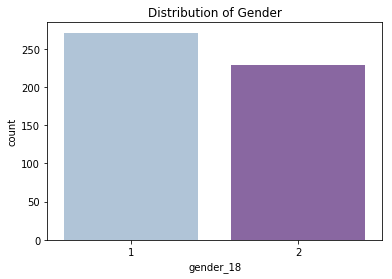

In [12]:
# Distribution of gender 
sns.countplot(x='gender_18', data=df_closed, palette="BuPu")
plt.title('Distribution of Gender')

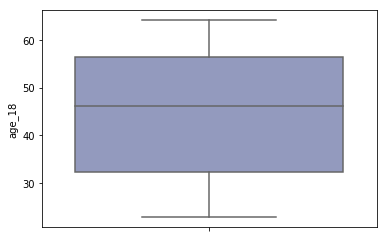

In [13]:
sns.boxplot(x="age_18", data=df_closed, orient="v", palette="BuPu")

Text(0.5, 0, 'Age')

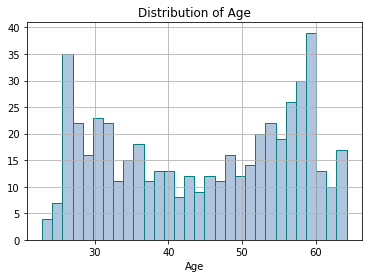

In [14]:
# Distribution of ages

df_closed.hist('age_18', bins=30, color = "lightsteelblue", ec="teal")
plt.title('Distribution of Age')
plt.xlabel('Age')

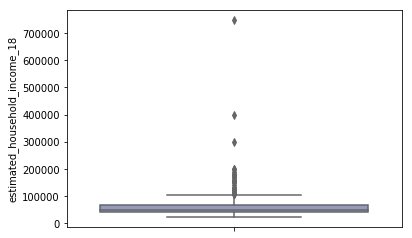

In [15]:
sns.boxplot(x="estimated_household_income_18", data=df_closed, orient="v", palette="BuPu")

In [16]:
#Excluding the outlier cases 

def outliers_iqr(x, mplyr):
    quartile_1, quartile_3 = np.percentile(x, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * mplyr)
    upper_bound = quartile_3 + (iqr * mplyr)
    return np.where((x > upper_bound) | (x < lower_bound))
indexes_to_drop = list(outliers_iqr(df_closed['estimated_household_income_18'], 3.5))

df_closed = df_closed.drop(df_closed.index[indexes_to_drop])


C:\Users\ZsoltNagy\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2095: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Text(0.5, 0, 'HH Income')

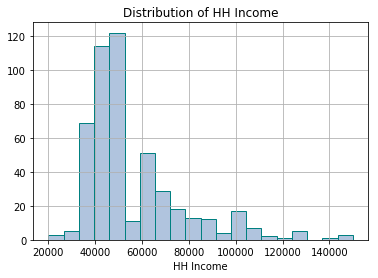

In [17]:
df_closed.hist('estimated_household_income_18', bins=20, color = "lightsteelblue", ec="teal")
plt.title('Distribution of HH Income')
plt.xlabel('HH Income')

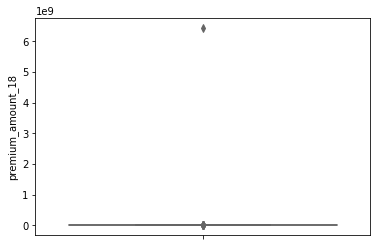

In [18]:
sns.boxplot(x="premium_amount_18", data=df_closed, orient="v", palette="BuPu")

In [19]:
#Excluding the outlier case 
df_closed = df_closed >> mask(X.premium_amount_18 < max(df_closed['premium_amount_18'])) 

Text(0.5, 0, 'Contract Value')

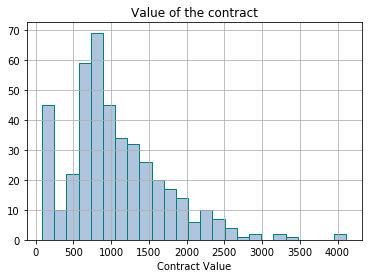

In [20]:
df_closed = df_closed >> mask(X.premium_amount_18 > 0) 

df_closed.hist(column='premium_amount_18', bins=25, color = "lightsteelblue", ec="teal")
plt.title('Value of the contract')
plt.xlabel('Contract Value')


<Figure size 1152x1152 with 0 Axes>

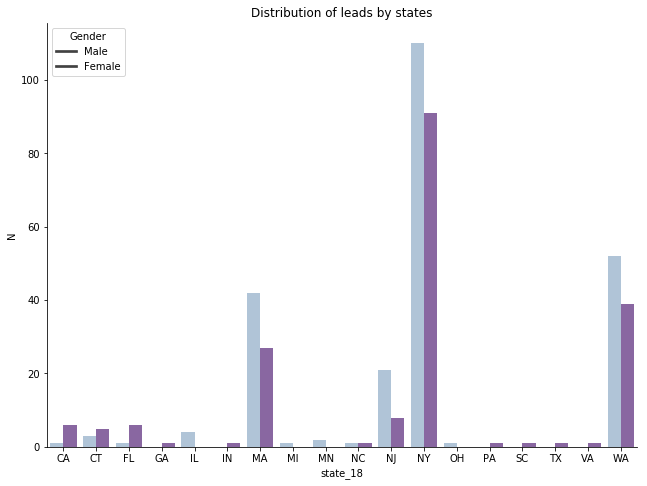

In [21]:
# Distribution of closed leads by states 
df_state = df_closed >> group_by(X.state_18, X.gender_18) >> summarize(N=n(X.leadID))


plt.figure(figsize=(16, 16))
g = sns.catplot(x='state_18', y='N', hue='gender_18', data=df_state, palette="BuPu", kind='bar', legend=False)
plt.title('Distribution of leads by states')
plt.legend(title='Gender', loc='upper left', labels=['Male', 'Female'])
g.fig.set_figwidth(10)
g.fig.set_figheight(7)

### <span style="color:dimgray"> I. Abc LLC's current most typical client </span>

In [22]:
# Creating new categorical age variable
#bins = pd.IntervalIndex.from_tuples([(0, 17), (18, 44), (45, 64), (65, 150)])
bins=[0, 18, 45, 65, np.inf]
df_closed['Age_c'] = pd.cut(round(df_closed['age_18'], 0), bins=bins, labels=['Under_18', '18-44', '45-64', '65_and_Above'])

In [23]:
# Checking classes of age
df_closed >> group_by(X.Age_c) >> summarize(N=n(X.leadID), Min=X.age_18.min(), Max=X.age_18.max())

,Age_c,N,Min,Max
0,Under_18,0,NaN,NaN
1,18-44,210,22.82,45.23
2,45-64,218,45.65,64.22
3,65_and_Above,0,NaN,NaN


In [24]:
# Creating new categorical income variable
df_closed['Income_c'] = pd.cut(df_closed['estimated_household_income_18'], bins=4, labels=['Lowest', 'Lower_middle', 'Upper_middle', 'Highest'])

In [25]:
# Checking classes of income
df_closed >> group_by(X.Income_c) >> summarize(N=n(X.leadID), Min=X.estimated_household_income_18.min(), Max=X.estimated_household_income_18.max())

,Income_c,N,Min,Max
0,Lowest,269,20000,52000
1,Lower_middle,114,55000,85000
2,Upper_middle,37,85800,115000
3,Highest,8,120000,150000


In [26]:
#Finding the 5 most typical customer groups
df_typ_cust = df_closed >> group_by(X.state_18, X.gender_18, X.Age_c, X.Income_c) >> summarize(N = n(X.leadID), Avg_Contr_Size = X.premium_amount_18.mean())
df_typ_cust.sort_values(by='N', ascending=False).head(5)

,Income_c,Age_c,gender_18,state_18,N,Avg_Contr_Size
50,Lowest,18-44,1,NY,44,743.772727
58,Lowest,18-44,2,NY,30,711.533333
54,Lowest,45-64,1,NY,28,999.750000
62,Lowest,45-64,2,NY,25,1205.000000
71,Lowest,18-44,1,WA,17,756.000000


#### <span style="color:darkred"> Question 1: Analysis on most typical client </span>

#### <span style="color:sienna"> <i> The typical client of ABC LLC is a young adult male who lives in New York, whose household income belongs to the lowest segment of the sample and average contract size is around 740 dollars. </i></span>

### <span style="color:dimgray"> II. Customer segmentation using K-means and Hierarchical clustering </span>

### <span style="color:steelblue"> 1. Customer segmentation on closed leads </span>

#### <span style="color:darkgray"> One-hot-encoding </span>

In [27]:
# One-hot-encoding categorical variables

# Selecting relevant features
df_closed_enc = df_closed >> select(X.leadID, 
                                    X.gender_18, 
                                    X.age_18, 
                                    X.estimated_household_income_18, 
                                    X.premium_amount_18, 
                                    X.state_18)

cat_columns = ["gender_18", "state_18"]
df_closed_enc = pd.get_dummies(df_closed_enc, 
                               prefix_sep="__",
                               columns=cat_columns)

df_closed_enc.head(10)

,leadID,age_18,estimated_household_income_18,premium_amount_18,gender_18__1,gender_18__2,state_18__CA,state_18__CT,state_18__FL,state_18__GA,...,state_18__MN,state_18__NC,state_18__NJ,state_18__NY,state_18__OH,state_18__PA,state_18__SC,state_18__TX,state_18__VA,state_18__WA
0,4,37.00,45000,700,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,382,34.89,76000,554,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
44,874,35.86,40000,916,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,946,46.94,35000,777,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,1218,52.92,47000,840,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,1368,56.46,55000,1118,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
113,1728,30.06,35000,1254,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
123,1856,35.79,35000,740,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,2028,45.65,35000,1107,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
198,2208,53.22,46000,1117,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### <span style="color:darkgray"> Running K-Means on data standardized with MinMaxScaler </span>

In [28]:
# Standardizing data to ensure that unit of dimension does not distort relative near-ness of observations

# Using MinMaxScale considering the presence of high number of binnary features: 
df_columns = ['age_18', 'estimated_household_income_18', 'premium_amount_18']
mms = MinMaxScaler()
df_closed_st_mm = mms.fit_transform(df_closed_enc[['age_18', 'estimated_household_income_18', 'premium_amount_18']])
df_closed_st_mm = pd.DataFrame(df_closed_st_mm, columns=df_columns)
df_closed_st_mm['leadID'] = list(df_closed_enc['leadID'])
df_closed_st_mm = df_closed_st_mm >> left_join(df_closed_enc, by='leadID') >> drop(['leadID', 'age_18_y', 'estimated_household_income_18_y', 'premium_amount_18_y'])
df_closed_st_mm.head(10)

C:\Users\ZsoltNagy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age_18_x,estimated_household_income_18_x,premium_amount_18_x,gender_18__1,gender_18__2,state_18__CA,state_18__CT,state_18__FL,state_18__GA,state_18__IL,...,state_18__MN,state_18__NC,state_18__NJ,state_18__NY,state_18__OH,state_18__PA,state_18__SC,state_18__TX,state_18__VA,state_18__WA
0,0.342512,0.192308,0.152912,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.291546,0.430769,0.116729,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.314976,0.153846,0.206444,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.582609,0.115385,0.171995,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.727053,0.207692,0.187608,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.812560,0.269231,0.256506,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0.174879,0.115385,0.290211,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0.313285,0.115385,0.162825,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.551449,0.115385,0.253779,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0.734300,0.200000,0.256258,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


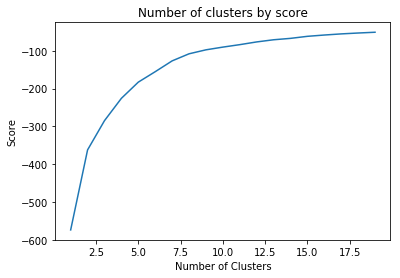

In [29]:
# Determining the number of clusters for K-means
clusters_range = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in clusters_range]
score = [kmeans[i].fit(df_closed_st_mm).score(df_closed_st_mm) for i in range(len(kmeans))]

plt.plot(clusters_range,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Number of clusters by score')
plt.show()

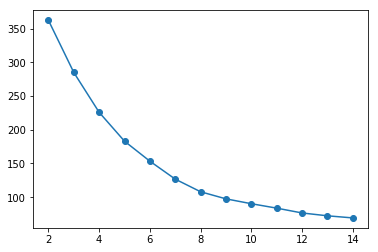

In [30]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[] 
for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(df_closed_st_mm)
    inertias.append(kmeans.inertia_)
plt.figure()
plt.plot(clusters_range,inertias, marker='o')

In [31]:
# Running K-means cluster on the encoded dataframe with 4 clusters based on elbow method
kmens = KMeans(n_clusters=4, random_state=0).fit(df_closed_st_mm)
# Adding cluster variable to closed lead dataframe 
df_closed['Clusters_mm'] = kmens.labels_
df_closed.head(10)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,created,max_bid,won,Age_c,Income_c,Clusters_mm
0,4,IL,1,37.00,45000,1.0,700,2017-12-22 16:08:21,22.0,1,18-44,Lowest,3
9,382,NY,2,34.89,76000,1.0,554,2018-01-23 22:49:55,3.0,1,18-44,Lower_middle,0
44,874,MA,2,35.86,40000,1.0,916,2018-01-24 15:12:14,5.5,1,18-44,Lowest,2
55,946,MA,1,46.94,35000,1.0,777,2018-01-24 16:59:42,4.0,1,45-64,Lowest,3
79,1218,MA,1,52.92,47000,1.0,840,2018-01-24 21:26:56,6.0,1,45-64,Lowest,3
92,1368,NY,2,56.46,55000,1.0,1118,2018-01-24 23:58:42,3.8,1,45-64,Lower_middle,0
113,1728,NY,1,30.06,35000,1.0,1254,2018-01-25 15:54:08,7.5,1,18-44,Lowest,1
123,1856,MA,1,35.79,35000,1.0,740,2018-01-25 17:54:41,8.0,1,18-44,Lowest,3
154,2028,NY,1,45.65,35000,1.0,1107,2018-01-25 20:50:29,6.0,1,45-64,Lowest,1
198,2208,WA,2,53.22,46000,1.0,1117,2018-01-25 23:32:58,6.0,1,45-64,Lowest,2


In [32]:
# Checking the clusters characteristics

#Creating cluster df
cluster_df_mm = df_closed >> group_by(X.Clusters_mm) >> summarize(Gender_dist = X.gender_18.mean(), 
                                                            Avg_Age = X.age_18.mean(), 
                                                            Avg_Inc = X.estimated_household_income_18.mean(), 
                                                            Avg_Contr_size = X.premium_amount_18.mean(),
                                                            Avg_MBids = X.max_bid.mean(),
                                                            SD_MBids = sd(X.max_bid),
                                                            N=n(X.leadID))

# Adding info about what states existing customers are coming from 
df_freq_state = df_closed >> group_by(X.state_18, X.Clusters_mm) >> summarize(State_N = n(X.state_18))
df_freq_state = df_freq_state.sort_values(by=['Clusters_mm', 'State_N'], ascending = [True, False])
df_freq_state = df_freq_state.pivot(index='Clusters_mm', columns='state_18', values='State_N')
cluster_df_mm['Most_Freq_States'] = pd.Series()
for rows in range(0,len(df_freq_state)):
    string = ", "
    string = string.join(df_freq_state.loc[rows].sort_values(ascending=False).index[0:5])
    cluster_df_mm.loc[rows, 'Most_Freq_States'] = string
cluster_df_mm

,Clusters_mm,Gender_dist,Avg_Age,Avg_Inc,Avg_Contr_size,Avg_MBids,SD_MBids,N,Most_Freq_States
0,0,2.0,44.167143,55582.659341,1092.472527,9.452747,4.809073,91,"NY, CA, CT, FL, GA"
1,1,1.0,42.362455,56101.827273,977.263636,8.594545,3.963708,110,"NY, CA, CT, FL, GA"
2,2,2.0,45.574592,54080.387755,1036.132653,10.905102,4.275545,98,"WA, MA, NJ, FL, CA"
3,3,1.0,45.245271,56877.906977,1126.651163,11.664341,5.287467,129,"WA, MA, NJ, IL, CT"


#### <span style="color:darkgray"> Running K-Means on data standardized with RobustScaler </span>

In [33]:
# Standardizing data to ensure that unit of dimension does not distort relative near-ness of observations

# Using RobustScaler considering the presence of possible outliers: 
df_columns = ['age_18', 'estimated_household_income_18', 'premium_amount_18']
rsc = RobustScaler()
df_closed_st_rc = rsc.fit_transform(df_closed_enc[['age_18', 'estimated_household_income_18', 'premium_amount_18']])
df_closed_st_rc = pd.DataFrame(df_closed_st_rc, columns=df_columns)
df_closed_st_rc['leadID'] = list(df_closed_enc['leadID'])
df_closed_st_rc = df_closed_st_rc >> left_join(df_closed_enc, by='leadID') >> drop(['leadID', 'age_18_y', 'estimated_household_income_18_y', 'premium_amount_18_y'])
df_closed_st_rc.head(10)

,age_18_x,estimated_household_income_18_x,premium_amount_18_x,gender_18__1,gender_18__2,state_18__CA,state_18__CT,state_18__FL,state_18__GA,state_18__IL,...,state_18__MN,state_18__NC,state_18__NJ,state_18__NY,state_18__OH,state_18__PA,state_18__SC,state_18__TX,state_18__VA,state_18__WA
0,-0.367743,-0.12,-0.282237,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.454007,1.12,-0.474342,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.414350,-0.32,0.001974,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.038635,-0.52,-0.180921,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.283115,-0.04,-0.098026,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.427841,0.28,0.267763,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,-0.651472,-0.52,0.446711,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,-0.417212,-0.52,-0.229605,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.014105,-0.52,0.253289,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0.295380,-0.08,0.266447,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


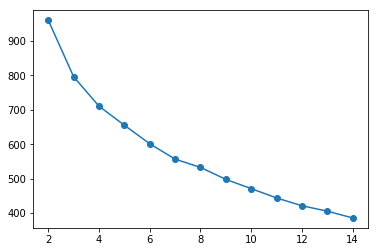

In [34]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[] 
for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(df_closed_st_rc)
    inertias.append(kmeans.inertia_)
plt.figure()
plt.plot(clusters_range,inertias, marker='o')

In [35]:
# Running K-means cluster on the encoded dataframe with 4 clusters based on elbow method
kmens = KMeans(n_clusters=4, random_state=0).fit(df_closed_st_rc)
# Adding cluster variable to closed lead dataframe 
df_closed['Clusters_rc'] = kmens.labels_
df_closed.head(10)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,created,max_bid,won,Age_c,Income_c,Clusters_mm,Clusters_rc
0,4,IL,1,37.00,45000,1.0,700,2017-12-22 16:08:21,22.0,1,18-44,Lowest,3,2
9,382,NY,2,34.89,76000,1.0,554,2018-01-23 22:49:55,3.0,1,18-44,Lower_middle,0,3
44,874,MA,2,35.86,40000,1.0,916,2018-01-24 15:12:14,5.5,1,18-44,Lowest,2,3
55,946,MA,1,46.94,35000,1.0,777,2018-01-24 16:59:42,4.0,1,45-64,Lowest,3,2
79,1218,MA,1,52.92,47000,1.0,840,2018-01-24 21:26:56,6.0,1,45-64,Lowest,3,2
92,1368,NY,2,56.46,55000,1.0,1118,2018-01-24 23:58:42,3.8,1,45-64,Lower_middle,0,3
113,1728,NY,1,30.06,35000,1.0,1254,2018-01-25 15:54:08,7.5,1,18-44,Lowest,1,2
123,1856,MA,1,35.79,35000,1.0,740,2018-01-25 17:54:41,8.0,1,18-44,Lowest,3,2
154,2028,NY,1,45.65,35000,1.0,1107,2018-01-25 20:50:29,6.0,1,45-64,Lowest,1,2
198,2208,WA,2,53.22,46000,1.0,1117,2018-01-25 23:32:58,6.0,1,45-64,Lowest,2,3


In [36]:
# Checking the clusters characteristics

#Creating cluster df
cluster_df_rc = df_closed >> group_by(X.Clusters_rc) >> summarize(Gender_dist = X.gender_18.mean(), 
                                                            Avg_Age = X.age_18.mean(), 
                                                            Avg_Inc = X.estimated_household_income_18.mean(), 
                                                            Avg_Contr_size = X.premium_amount_18.mean(),
                                                            Avg_MBids = X.max_bid.mean(),
                                                            SD_MBids = sd(X.max_bid),
                                                            N=n(X.leadID))

# Adding info about what states existing customers are coming from 
df_freq_state = df_closed >> group_by(X.state_18, X.Clusters_rc) >> summarize(State_N = n(X.state_18))
df_freq_state = df_freq_state.sort_values(by=['Clusters_rc', 'State_N'], ascending = [True, False])
df_freq_state = df_freq_state.pivot(index='Clusters_rc', columns='state_18', values='State_N')
cluster_df_rc['Most_Freq_States'] = pd.Series()
for rows in range(0,len(df_freq_state)):
    string = ", "
    string = string.join(df_freq_state.loc[rows].sort_values(ascending=False).index[0:5])
    cluster_df_rc.loc[rows, 'Most_Freq_States'] = string
cluster_df_rc



,Clusters_rc,Gender_dist,Avg_Age,Avg_Inc,Avg_Contr_size,Avg_MBids,SD_MBids,N,Most_Freq_States
0,0,1.347826,53.600725,62791.362319,2098.956522,10.539130,5.389456,69,"NY, WA, MA, NJ, FL"
1,1,1.333333,46.303333,99946.294118,1200.862745,11.631373,4.944714,51,"NY, WA, MA, NJ, CT"
2,2,1.000000,40.683187,45848.262500,754.218750,9.615000,4.398387,160,"NY, WA, MA, NJ, IL"
3,3,2.000000,43.329730,47978.135135,858.418919,10.271622,4.783589,148,"NY, WA, MA, NJ, CT"


In [37]:
print(cluster_df_mm)
print(cluster_df_rc)

   Clusters_mm  Gender_dist    Avg_Age       Avg_Inc  Avg_Contr_size  \
0            0          2.0  44.167143  55582.659341     1092.472527   
1            1          1.0  42.362455  56101.827273      977.263636   
2            2          2.0  45.574592  54080.387755     1036.132653   
3            3          1.0  45.245271  56877.906977     1126.651163   

   Avg_MBids  SD_MBids    N    Most_Freq_States  
0   9.452747  4.809073   91  NY, CA, CT, FL, GA  
1   8.594545  3.963708  110  NY, CA, CT, FL, GA  
2  10.905102  4.275545   98  WA, MA, NJ, FL, CA  
3  11.664341  5.287467  129  WA, MA, NJ, IL, CT  
   Clusters_rc  Gender_dist    Avg_Age       Avg_Inc  Avg_Contr_size  \
0            0     1.347826  53.600725  62791.362319     2098.956522   
1            1     1.333333  46.303333  99946.294118     1200.862745   
2            2     1.000000  40.683187  45848.262500      754.218750   
3            3     2.000000  43.329730  47978.135135      858.418919   

   Avg_MBids  SD_MBids    N 

#### <span style="color:darkgray"> Running Hierarchical clustering on data standardized with MinMaxScaler </span>

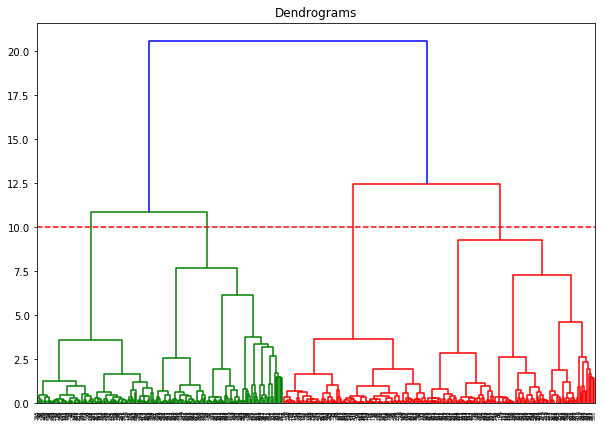

In [38]:
# Applying hierarchical clustering
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_closed_st_mm, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')

In [39]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
# Adding cluster variable to closed lead dataframe 
df_closed['Clusters_hc'] = cluster.fit_predict(df_closed_st_rc)
df_closed.head(10)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,created,max_bid,won,Age_c,Income_c,Clusters_mm,Clusters_rc,Clusters_hc
0,4,IL,1,37.00,45000,1.0,700,2017-12-22 16:08:21,22.0,1,18-44,Lowest,3,2,3
9,382,NY,2,34.89,76000,1.0,554,2018-01-23 22:49:55,3.0,1,18-44,Lower_middle,0,3,2
44,874,MA,2,35.86,40000,1.0,916,2018-01-24 15:12:14,5.5,1,18-44,Lowest,2,3,2
55,946,MA,1,46.94,35000,1.0,777,2018-01-24 16:59:42,4.0,1,45-64,Lowest,3,2,1
79,1218,MA,1,52.92,47000,1.0,840,2018-01-24 21:26:56,6.0,1,45-64,Lowest,3,2,1
92,1368,NY,2,56.46,55000,1.0,1118,2018-01-24 23:58:42,3.8,1,45-64,Lower_middle,0,3,2
113,1728,NY,1,30.06,35000,1.0,1254,2018-01-25 15:54:08,7.5,1,18-44,Lowest,1,2,3
123,1856,MA,1,35.79,35000,1.0,740,2018-01-25 17:54:41,8.0,1,18-44,Lowest,3,2,1
154,2028,NY,1,45.65,35000,1.0,1107,2018-01-25 20:50:29,6.0,1,45-64,Lowest,1,2,3
198,2208,WA,2,53.22,46000,1.0,1117,2018-01-25 23:32:58,6.0,1,45-64,Lowest,2,3,2


In [40]:
# Checking the clusters characteristics

#Creating cluster df
cluster_df_hc = df_closed >> group_by(X.Clusters_hc) >> summarize(Gender_dist = X.gender_18.mean(), 
                                                            Median_Age = median(X.age_18),
                                                            FirstQ_Age = median(X.age_18)- IQR(X.age_18)/2, 
                                                            ThirdQ_Age = median(X.age_18)+ IQR(X.age_18)/2,
                                                            Median_Inc = median(X.estimated_household_income_18),
                                                            FirstQ_Inc = median(X.estimated_household_income_18)- IQR(X.estimated_household_income_18)/2,
                                                            ThirdQ_Inc = median(X.estimated_household_income_18)+ IQR(X.estimated_household_income_18)/2,
                                                            Avg_Contr_size = X.premium_amount_18.mean(),
                                                            Avg_MBids = X.max_bid.mean(),
                                                            SD_MBids = sd(X.max_bid),
                                                            N=n(X.leadID))

# Adding info about what states existing customers are coming from 
df_freq_state = df_closed >> group_by(X.state_18, X.Clusters_hc) >> summarize(State_N = n(X.state_18))
df_freq_state = df_freq_state.sort_values(by=['Clusters_hc', 'State_N'], ascending = [True, False])
df_freq_state = df_freq_state.pivot(index='Clusters_hc', columns='state_18', values='State_N')
cluster_df_rc['Most_Freq_States'] = pd.Series()
for rows in range(0,len(df_freq_state)):
    string = ", "
    string = string.join(df_freq_state.loc[rows].sort_values(ascending=False).index[0:5])
    cluster_df_hc.loc[rows, 'Most_Freq_States'] = string
cluster_df_hc[['Median_Age', 'FirstQ_Age', 'ThirdQ_Age', 'Median_Inc', 'FirstQ_Inc', 'ThirdQ_Inc', 'Avg_Contr_size']] = round(cluster_df_hc[['Median_Age', 'FirstQ_Age', 'ThirdQ_Age', 'Median_Inc', 'FirstQ_Inc', 'ThirdQ_Inc', 'Avg_Contr_size']], 0)
cluster_df_hc


,Clusters_hc,Gender_dist,Median_Age,FirstQ_Age,ThirdQ_Age,Median_Inc,FirstQ_Inc,ThirdQ_Inc,Avg_Contr_size,Avg_MBids,SD_MBids,N,Most_Freq_States
0,0,1.307692,53.0,45.0,60.0,86900.0,71225.0,102575.0,1709.0,10.952564,5.189043,78,"NY, MA, WA, NJ, CT"
1,1,1.000000,46.0,33.0,59.0,46001.0,38126.0,53876.0,929.0,11.036792,4.926204,106,"WA, MA, NJ, NC, MN"
2,2,2.000000,46.0,33.0,59.0,47000.0,37000.0,57000.0,955.0,10.120606,4.785821,165,"NY, WA, MA, NJ, FL"
3,3,1.000000,37.0,26.0,48.0,41600.0,35780.0,47420.0,816.0,8.669620,3.794745,79,"NY, IL, OH, CA, CT"


#### <span style="color:darkred"> Question 2: Analysis on customer segments that Abc LLC should target to maximize their income? </span>

#### <span style="color:sienna"> <i> Considerations on Cluster analysis </i></span>

1. Clusters' characteristics are highly depend on encoding and standardization method. Mixed binnary and continous feature space makes the analysis challenging. Using Kmeans and hierarchical cluster algortihms provided fairly different outcomes.
2. It is likely that the importance of features varies depending on standardization method. Variance between groups' by features varies by chosen method.
3. For this analysis, hierarchical cluster approach was chosen considering it provides failry good result regarding difference between clusters for each feature

#### <span style="color:sienna"> <i> Description of clusters of current customers:</i></span>
-> <b>Cluster 1:</b> Mixed men and women (with more men), older adults, with middle HH income, having average contract size the highest, mostly from NY, MA, WA<br/>
-> <b>Cluster 2:</b> Exclusively men, middle aged, their HH income is around the median, having contract size above the median, mostly from MA, WA, NJ <br/>
-> <b>Cluster 3:</b> Exclusively women, middle aged, from low income HH, having contract size around the median, mostly from NY, WA, MA <br/>
-> <b>Cluster 4:</b> Exclusively men, youngest average age, more HH in the low income group, having contract less than average, mostly from NY, IL, OH <br/>  

##### <span style="color:sienna"> <i> Targeting strategy:</i></span>
In general, the first and fourth clusters could be targeted considering the lower number of successfull sales there. Plus, first cluster's high average contract size can be a very good starting point to maximize income. In this group, we can see the largest purchasing power.
The company is strong in NY, MA and WA, in almost every segment. Other states like NJ and CT could also be in the point of interest, since they are present in case of more than one segment.
Gender specificity can be recognized in the sample, meaning that it may be a good idea to target gender separately.
As regards age, the company is successfull in the middle aged customers, while it may want to increase the number of successfull sales in the younger and older adult groups.

### <span style="color:steelblue"> Customer segmentation on lost leads </span>

In [41]:
# Creating dataframe for lost leads
df_lost = df >> mask(X.cpa_status_18 == 0)

In [42]:
# Checking dataframe
df_lost.describe()

,leadID,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,max_bid,won
count,1.828800e+04,18288.000000,18288.000000,18288.000000,18288.0,18288.0,18288.000000,18288.000000
mean,9.001760e+05,1.521216,44.099319,60459.095199,0.0,0.0,9.219934,0.936406
std,5.901949e+05,0.499563,11.752940,47671.770130,0.0,0.0,3.377421,0.244034
min,3.000000e+01,1.000000,18.750000,35000.000000,0.0,0.0,0.500000,0.000000
25%,3.247570e+05,1.000000,33.710000,40000.000000,0.0,0.0,6.500000,1.000000
50%,9.397920e+05,2.000000,44.550000,50000.000000,0.0,0.0,10.000000,1.000000
75%,1.412484e+06,2.000000,55.000000,68200.000000,0.0,0.0,12.000000,1.000000
max,1.879028e+06,2.000000,64.950000,999999.000000,0.0,0.0,23.000000,1.000000


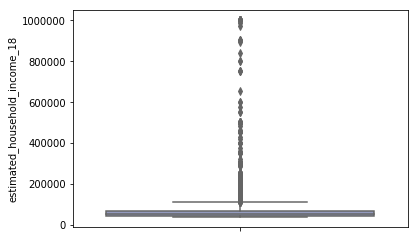

In [43]:
# Checking HH income for detecting outliers
sns.boxplot(x="estimated_household_income_18", data=df_lost, orient="v", palette="BuPu")

In [44]:
indexes_to_drop = list(outliers_iqr(df_lost['estimated_household_income_18'], 3.5))

df_lost = df_lost.drop(df_lost.index[indexes_to_drop])

C:\Users\ZsoltNagy\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2095: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Text(0.5, 0, 'HH Income')

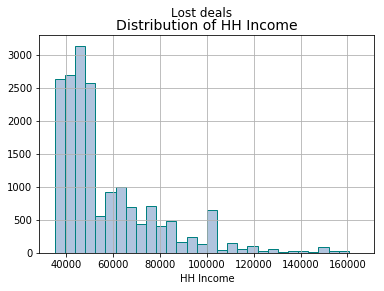

In [45]:
df_lost.hist('estimated_household_income_18', bins=30, color = "lightsteelblue", ec="teal")
plt.title('Distribution of HH Income', fontsize=14)
plt.suptitle('Lost deals')
plt.xlabel('HH Income')

#### <span style="color:darkgray"> One-hot-encoding </span>

In [46]:
# One-hot-encoding categorical variables

# Selecting relevant features
df_lost_enc = df_lost >> select(X.leadID, 
                                    X.gender_18, 
                                    X.age_18, 
                                    X.estimated_household_income_18,
                                    X.state_18)

cat_columns = ["gender_18", "state_18"]
df_lost_enc = pd.get_dummies(df_lost_enc, 
                               prefix_sep="__",
                               columns=cat_columns)


df_lost_enc.head(10)

,leadID,age_18,estimated_household_income_18,gender_18__1,gender_18__2,state_18__CA,state_18__CT,state_18__FL,state_18__MA,state_18__MI,state_18__MN,state_18__NC,state_18__NJ,state_18__NY,state_18__OH,state_18__SC,state_18__TX,state_18__VA,state_18__WA
1,30,43.35,65000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,120,32.96,90000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,258,34.82,65000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,266,40.35,65000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,348,36.00,35000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,354,36.69,35000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,360,55.02,35000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,370,57.89,90000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10,400,25.81,35000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11,406,53.40,40000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### <span style="color:darkgray"> Running Hierarchical Clustering on data standardized with MinMaxScaler </span>

In [47]:
# Using MinMaxScaler:
df_columns = ['age_18', 'estimated_household_income_18']
mms = MinMaxScaler()
df_lost_st = mms.fit_transform(df_lost_enc[['age_18', 'estimated_household_income_18']])
df_lost_st = pd.DataFrame(df_lost_st, columns=df_columns)
df_lost_st['leadID'] = list(df_lost_enc['leadID'])
df_lost_st = df_lost_st >> left_join(df_lost_enc, by='leadID') >> drop(['leadID', 'age_18_y', 'estimated_household_income_18_y'])
df_lost_st.head(10)

C:\Users\ZsoltNagy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age_18_x,estimated_household_income_18_x,gender_18__1,gender_18__2,state_18__CA,state_18__CT,state_18__FL,state_18__MA,state_18__MI,state_18__MN,state_18__NC,state_18__NJ,state_18__NY,state_18__OH,state_18__SC,state_18__TX,state_18__VA,state_18__WA
0,0.532468,0.230769,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.307576,0.423077,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.347835,0.230769,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.467532,0.230769,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.373377,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0.388312,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0.785065,0.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0.847186,0.423077,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0.152814,0.000000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0.750000,0.038462,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [48]:
df_lost['Clusters_hc'] = cluster.fit_predict(df_lost_st)
df_lost.head(10)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,created,max_bid,won,Clusters_hc
1,30,NY,2,43.35,65000,0.0,0,2018-01-18 16:18:19,4.0,1,2
2,120,NY,1,32.96,90000,0.0,0,2018-01-22 16:08:57,5.0,1,3
3,258,NY,1,34.82,65000,0.0,0,2018-01-23 17:28:09,5.0,1,3
4,266,NY,2,40.35,65000,0.0,0,2018-01-23 18:16:10,6.0,1,2
5,348,NY,1,36.00,35000,0.0,0,2018-01-23 22:29:37,4.0,1,3
6,354,NY,1,36.69,35000,0.0,0,2018-01-23 22:30:47,4.0,1,3
7,360,MA,2,55.02,35000,0.0,0,2018-01-23 22:39:53,4.0,1,0
8,370,MA,1,57.89,90000,0.0,0,2018-01-23 22:44:28,4.0,1,1
10,400,NY,2,25.81,35000,0.0,0,2018-01-23 23:00:26,2.0,1,2
11,406,NY,1,53.40,40000,0.0,0,2018-01-23 23:02:12,5.0,1,3


In [49]:
# Checking the clusters characteristics

#Creating cluster df
cluster_df_lost = df_lost >> group_by(X.Clusters_hc) >> summarize(Gender_dist = X.gender_18.mean(), 
                                                            Avg_Age = X.age_18.mean(), 
                                                            Avg_Inc = X.estimated_household_income_18.mean(),
                                                            Avg_MBids = X.max_bid.mean(),
                                                            SD_MBids = sd(X.max_bid),
                                                            N=n(X.leadID))

# Adding info about what states lost possible customers are coming from 
df_freq_state = df_lost >> group_by(X.state_18, X.Clusters_hc) >> summarize(State_N = n(X.state_18))
df_freq_state = df_freq_state.sort_values(by=['Clusters_hc', 'State_N'], ascending = [True, False])
df_freq_state = df_freq_state.pivot(index='Clusters_hc', columns='state_18', values='State_N')
cluster_df_lost['Most_Freq_States'] = pd.Series()
for rows in range(0,len(df_freq_state)):
    string = ", "
    string = string.join(df_freq_state.loc[rows].sort_values(ascending=False).index[0:5])
    cluster_df_lost.loc[rows, 'Most_Freq_States'] = string
cluster_df_lost


,Clusters_hc,Gender_dist,Avg_Age,Avg_Inc,Avg_MBids,SD_MBids,N,Most_Freq_States
0,0,2.000000,44.512358,57370.952464,9.584264,3.302956,5722,"WA, MA, FL, NJ, TX"
1,1,1.000198,44.495778,58609.167525,9.257208,3.457265,5050,"WA, MA, NJ, FL, TX"
2,2,2.000000,43.405900,55037.082703,9.005568,3.342431,3700,"NY, CA, CT, FL, MA"
3,3,1.000000,43.550651,55883.289649,8.802337,3.360512,3594,"NY, CA, CT, FL, MA"


### <span style="color:steelblue"> Current market potential for customer segments </span>

<b>Market potential:</b> The entire size of the market for a product at a specific time (in this case last one year counted from the latest lead). It represents the upper limits of the market for a product. Market potential is usually measured either by sales value or sales volume. 

#### <span style="color:darkgray"> Analyzing Potential Customer Base </span> 

In [50]:
# Checking customer segments again
cluster_df_hc

,Clusters_hc,Gender_dist,Median_Age,FirstQ_Age,ThirdQ_Age,Median_Inc,FirstQ_Inc,ThirdQ_Inc,Avg_Contr_size,Avg_MBids,SD_MBids,N,Most_Freq_States
0,0,1.307692,53.0,45.0,60.0,86900.0,71225.0,102575.0,1709.0,10.952564,5.189043,78,"NY, MA, WA, NJ, CT"
1,1,1.000000,46.0,33.0,59.0,46001.0,38126.0,53876.0,929.0,11.036792,4.926204,106,"WA, MA, NJ, NC, MN"
2,2,2.000000,46.0,33.0,59.0,47000.0,37000.0,57000.0,955.0,10.120606,4.785821,165,"NY, WA, MA, NJ, FL"
3,3,1.000000,37.0,26.0,48.0,41600.0,35780.0,47420.0,816.0,8.669620,3.794745,79,"NY, IL, OH, CA, CT"


In [51]:
# Converting created feature in df to timestamp
df['created'] = pd.to_datetime(df.created) 

# Market potential for customer segment 1
mp_cs1_df = df >> mask(X.age_18 >=53, 
                       X.age_18 <= 60, 
                       X.estimated_household_income_18 >= 71225, 
                       X.estimated_household_income_18 <= 102575,
                       X.created >= pd.to_datetime('2018-02-15 12:55:28'),
           (X.state_18 == 'NY') | (X.state_18 == 'MA') | (X.state_18 == 'WA'))
print('Customer base for Segment 1: ' + str(len(mp_cs1_df)))
print('Estimated potential income  based on average contract size for segment 1: ' + str(len(mp_cs1_df)*cluster_df_hc.loc[0,'Avg_Contr_size']) + str(' USD'))

Customer base for Segment 1: 5371
Estimated potential income  based on average contract size for segment 1: 9179039.0 USD


In [52]:
# Market potential for customer segment 2
mp_cs2_df = df >> mask(X.gender_18 == 1,
                       X.age_18 >=33, 
                       X.age_18 <= 59, 
                       X.estimated_household_income_18 >= 38126, 
                       X.estimated_household_income_18 <= 53876,
                       X.created >= pd.to_datetime('2018-02-15 12:55:28'),
                       (X.state_18 == 'NJ') | (X.state_18 == 'MA') | (X.state_18 == 'WA'))
print('Customer base for Segment 2: ' + str(len(mp_cs2_df)))
print('Estimated potential income based on average contract size for segment 2: ' + str(len(mp_cs2_df)*cluster_df_hc.loc[1,'Avg_Contr_size']) + str(' USD'))

Customer base for Segment 2: 19379
Estimated potential income based on average contract size for segment 2: 18003091.0 USD


In [53]:
# Market potential for customer segment 3
mp_cs3_df = df >> mask(X.gender_18 == 2,
                       X.age_18 >=33, 
                       X.age_18 <= 59, 
                       X.estimated_household_income_18 >= 37000, 
                       X.estimated_household_income_18 <= 57000,
                       X.created >= pd.to_datetime('2018-02-15 12:55:28'),
                       (X.state_18 == 'NY') | (X.state_18 == 'MA') | (X.state_18 == 'WA'))
print('Customer base for Segment 3: ' + str(len(mp_cs3_df)))
print('Estimated potential income based on average contract size for segment 3: ' + str(len(mp_cs3_df)*cluster_df_hc.loc[2,'Avg_Contr_size']) + str(' USD'))

Customer base for Segment 3: 30181
Estimated potential income based on average contract size for segment 3: 28822855.0 USD


In [54]:
# Market potential for customer segment 4
mp_cs4_df = df >> mask(X.gender_18 == 1,
                       X.age_18 >=26, 
                       X.age_18 <= 48, 
                       X.estimated_household_income_18 >= 35780, 
                       X.estimated_household_income_18 <= 47420,
                       X.created >= pd.to_datetime('2018-02-15 12:55:28'),
                       (X.state_18 == 'NY') | (X.state_18 == 'MA') | (X.state_18 == 'WA'))
print('Customer base for Segment 4: ' + str(len(mp_cs4_df)))
print('Estimated potential income based on average contract size for segment 4: ' + str(len(mp_cs4_df)*cluster_df_hc.loc[3,'Avg_Contr_size']) + str(' USD'))

Customer base for Segment 4: 19959
Estimated potential income based on average contract size for segment 4: 16286544.0 USD


### <span style="color:steelblue"> How much more Abc LLC should bid on average on the segments to increase their income by 30% </span>

In [55]:
# Creating new data_frame for cases where cpa status is known
df_won = df[df['cpa_status_18'].notna()] 
df_won = df_won >> mask(X.premium_amount_18 < max(df_won['premium_amount_18'])) 

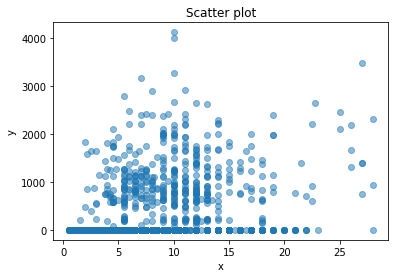

In [56]:
# Checking the scatter plot about how max bids relates to contract size
plt.scatter(df_won['max_bid'], df_won['premium_amount_18'], alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [57]:
# Running regression analysis with one predictor
# formula: response ~ predictor + predictor
est = smf.ols(formula='premium_amount_18 ~ max_bid', data=df_won).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      premium_amount_18   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     56.56
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           5.71e-14
Time:                        15:52:56   Log-Likelihood:            -1.2532e+05
No. Observations:               18787   AIC:                         2.506e+05
Df Residuals:                   18785   BIC:                         2.507e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0674      4.008     -0.765      0.444     -10.923       4.789
max_bid        3.0561      0.406      7.520      0.000       2.260       3.853
==============================================================================
Omnibus:                    28114.409   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9266686.086
Skew:                           9.456   Prob(JB):                         0.00
Kurtosis:                     110.146   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
total_inc = df_won >> mask(X.created > pd.to_datetime('2018-01-01 0:0:1'), X.created < pd.to_datetime('2019-01-01 0:0:1')) >> select(X.premium_amount_18)
sum(total_inc.iloc[:,0])
print('Total income of ABC LLC in 2018: ' + str(sum(total_inc.iloc[:,0])))
print('30% of total income of ABC LLC in 2018: ' + str(sum(total_inc.iloc[:,0])*0.3))
print('The amount that LLC should spend on bidding in average to have 30% increase in income: ' + str(round(sum((total_inc.iloc[:,0])*0.3)/3.0561)))

Total income of ABC LLC in 2018: 431885
30% of total income of ABC LLC in 2018: 129565.5
The amount that LLC should spend on bidding in average to have 30% increase in income: 42396


#### <span style="color:darkred"> Question 4: Analysis </span>
According to the p value, the relationship between the amount of bid and contract size is significant.
The coefficient of 3.0561 means that as the max bid variable's unit increases by 1, the predicted value of contract size increases by 3.0561. This means that ABC LLC should increase spend on bidding around 42396 USD in 2019 to meet 30% increase in income. The investment would pay off.